In [1]:
%cd ../src

/home/ubuntu/SPVD_Lightning/src


In [2]:
from dataloaders.shapenet.shapenet_loader import ShapeNet

categories = ['car']
path = "../data/ShapeNet"

te = ShapeNet(path, "val", 2048, categories, load_renders=True)

Loading (val) renders for car (02958343): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 352/352 [00:00<00:00, 367.88it/s]


In [3]:
import numpy as np
import torch

samples = 16
references = [te[idx] for idx in np.random.choice(list(range(len(te))), size=(samples,))]

reference_images = torch.stack([r["render-features"] for r in references]).to("cuda")

(16, 512, 512, 4)


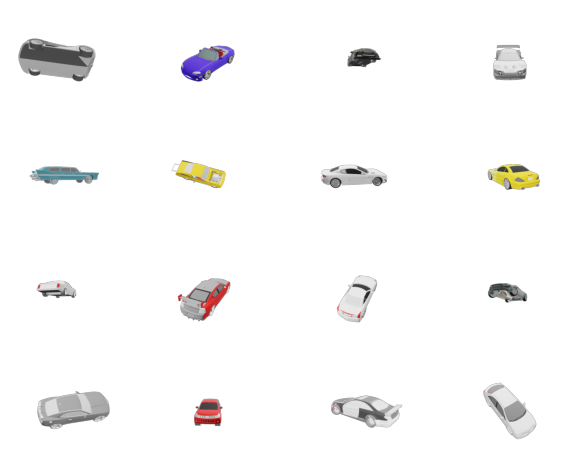

In [4]:
from utils.visualization import display_renders_grid

def load_image(selected_file, selected_view):
    from PIL import Image
    return np.array(Image.open("../data/ShapeNet/renders/" + selected_file + f"/00{selected_view}.png"))

renders = np.stack([load_image(r['filename'], r['selected-view']) for r in references])
print(renders.shape)
display_renders_grid(renders)